<a href="https://colab.research.google.com/github/kaicque/Bootcamp_DataScience/blob/main/Desafio_aula_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##lista de desafios
Desafio 01: Refaça as manipulações feitas em aulas e gaste um tempo analisando os dados e entendendo os efeitos das manipulações

Desafio 02: Reflita sobre os problemas na manipulação de dados e discuta esse assunto no Discord.

#Importação de biblioteca e carga dos dados localizados no git

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from IPython.display import Image
!git clone https://github.com/kaicque/Bootcamp_DataScience.git
import seaborn as sns

Cloning into 'Bootcamp_DataScience'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 37 (delta 10), reused 12 (delta 3), pack-reused 0
Unpacking objects: 100% (37/37), done.


In [2]:
dados = pd.read_csv("/content/Bootcamp_DataScience/Bases/Base por data de internação.csv", encoding="iso-8859-1",
                    skiprows = 3, sep=";", skipfooter = 12,
                    thousands=".", decimal=",")
dados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,9.964113e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,4.500485e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1.917248e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2306119.95,2921522.16,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,3.288770e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36792954.02,36984314.60,35579251.49,35247659.30,37046350.76,34683341.17,34908420.50,29184688.30,43327731.71,40994545.21,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4.705309e+09


#Criação de lista de colunas usáveis (aquelas que todas as regiões tem valor preenchidos)

In [3]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0,"Unidade da Federação")
colunas_usaveis

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


#Criação de um novo dataframe somente com os meses usáveis

In [4]:
usaveis = dados[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")
usaveis = usaveis.drop("Total", axis=1) ## exclusão da coluna totalizadora original do dataframe pois fizemos tratamento de colunas, por isso precisamos refazer esse dado
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2688315.70,2740952.07,247

##Criação novo dataframe com o totalizador considerando somente as colunas usaveis e ordenando pelo total

In [5]:
#Ordenando os dados pela colunas totais
usaveis["Total"] = usaveis.sum(axis=1)
usaveisordenadas = usaveis.sort_values(by='Total', ascending=False)
usaveisordenadas = usaveisordenadas.drop('Total', axis=1)
usaveisordenadas = usaveisordenadas.iloc[:,6:] #pulando as primeiras colunas onde tem dados fragmentados
usaveisordenadas.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1.729620e+08,1.705567e+08,1.703382e+08,1.724621e+08,1.754930e+08,1.795699e+08,1.800051e+08,1.801517e+08,1.918599e+08,1.909273e+08,1.770939e+08,1.924121e+08,1.786413e+08,2.170117e+08,2.151281e+08,2.129052e+08,2.127155e+08,2.140794e+08,2.152656e+08,2.142499e+08,2.161171e+08,2.091840e+08,1.921570e+08,2.135128e+08,1.957879e+08,2.394114e+08,2.212029e+08,2.319228e+08,2.240438e+08,2.241577e+08,2.487619e+08,2.241210e+08,2.393542e+08,2.256391e+08,2.107109e+08,2.291469e+08,2.216600e+08,2.414456e+08,2.299206e+08,2.508174e+08,...,2.596379e+08,2.796517e+08,2.542191e+08,2.853474e+08,2.863719e+08,2.916791e+08,2.791022e+08,2.861512e+08,2.956691e+08,2.776856e+08,3.027666e+08,2.782684e+08,2.667703e+08,2.918937e+08,2.680835e+08,2.871550e+08,2.928705e+08,3.091409e+08,2.816218e+08,3.071951e+08,3.035841e+08,2.940841e+08,3.038664e+08,2.827918e+08,2.733575e+08,3.038659e+08,2.720507e+08,2.779387e+08,2.551787e+08,3.142763e+08,3.282936e+08,3.619869e+08,3.502687e+08,3.388725e+08,3.280558e+08,3.245998e+08,3.268462e+08,3.241154e+08,2.681931e+08,1.774083e+08
31 Minas Gerais,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,7.961919e+07,8.220921e+07,8.037412e+07,8.240913e+07,8.861348e+07,8.448700e+07,8.892863e+07,9.901816e+07,8.367512e+07,1.002586e+08,9.183133e+07,9.728970e+07,9.572340e+07,1.000500e+08,9.897718e+07,9.820212e+07,9.696239e+07,9.476764e+07,9.241277e+07,9.580656e+07,9.076489e+07,1.073899e+08,1.008360e+08,1.054946e+08,9.966612e+07,1.033654e+08,1.078443e+08,1.043411e+08,1.005254e+08,1.019436e+08,9.953895e+07,1.077661e+08,1.031494e+08,1.110771e+08,1.060943e+08,1.154872e+08,...,1.383666e+08,1.465106e+08,1.307340e+08,1.515068e+08,1.507026e+08,1.536049e+08,1.502625e+08,1.567219e+08,1.604849e+08,1.459986e+08,1.572946e+08,1.481728e+08,1.454224e+08,1.532364e+08,1.426908e+08,1.519762e+08,1.579579e+08,1.636411e+08,1.541742e+08,1.667759e+08,1.617747e+08,1.574378e+08,1.661651e+08,1.521715e+08,1.524733e+08,1.582658e+08,1.414634e+08,1.476549e+08,1.274473e+08,1.427463e+08,1.572766e+08,1.774666e+08,1.821761e+08,1.814225e+08,1.745856e+08,1.685647e+08,1.663770e+08,1.550645e+08,1.198774e+08,7.978084e+07
41 Paraná,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,5.609475e+07,5.980240e+07,5.669900e+07,5.809199e+07,6.136594e+07,5.966721e+07,5.781620e+07,6.038159e+07,5.723910e+07,6.907049e+07,6.405468e+07,6.868554e+07,6.793123e+07,7.095876e+07,6.922578e+07,6.784997e+07,6.855821e+07,6.715850e+07,6.309427e+07,6.690264e+07,6.450113e+07,7.713887e+07,7.075540e+07,7.345676e+07,7.183902e+07,7.301383e+07,7.615101e+07,7.424096e+07,7.304239e+07,7.636475e+07,7.051764e+07,7.471278e+07,7.131474e+07,7.691467e+07,7.423294e+07,8.170902e+07,...,1.055581e+08,1.161332e+08,1.070760e+08,1.223314e+08,1.247313e+08,1.270831e+08,1.226169e+08,1.279919e+08,1.312572e+08,1.206474e+08,1.295302e+08,1.218107e+08,1.129846e+08,1.241592e+08,1.177155e+08,1.239074e+08,1.274645e+08,1.326080e+08,1.248659e+08,1.347087e+08,1.271744e+08,1.262040e+08,1.338706e+08,1.262211e+08,1.135738e+08,1.223301e+08,1.161257e+08,1.147766e+08,9.778406e+07,1.110128e+08,1.152037e+08,1.238566e+08,1.250895e+08,1.217712e+08,1.275061e+08,1.334433e+08,1.221463e+08,1.069489e+08,8.313018e+07,4.348073e+07
43

#Criação das analises

##Desafio 01: Refaça as manipulações feitas em aulas e gaste um tempo analisando os dados e entendendo os efeitos das manipulações

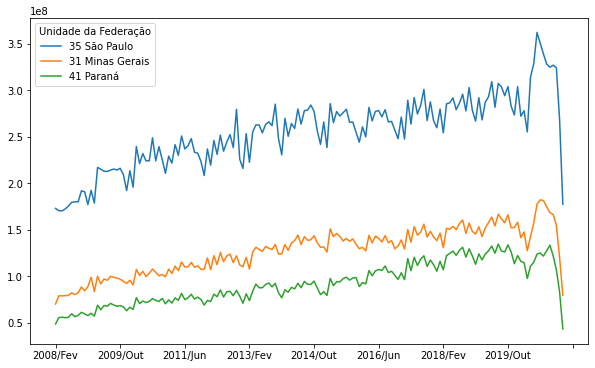

In [6]:
#Grafico inicial como referência de introdução
usaveisordenadas.head(3).T.plot(figsize=(10,6))

In [7]:
#Dividindo os valores por 1,000,000 para ter o gasto  em milhões
usaveisordenadas = (usaveisordenadas / 1000000)

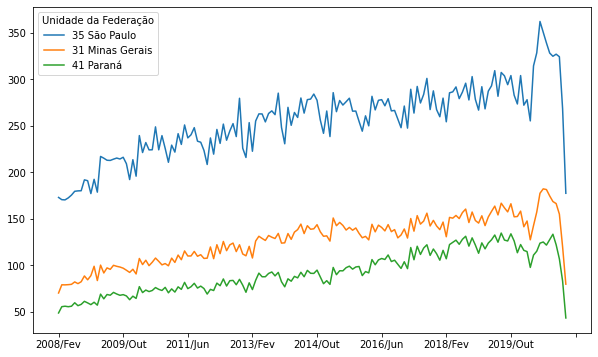

In [8]:
#Grafico básico com a númeração "melhorada" com a divisão
usaveisordenadas.head(3).T.plot(figsize=(10,6))

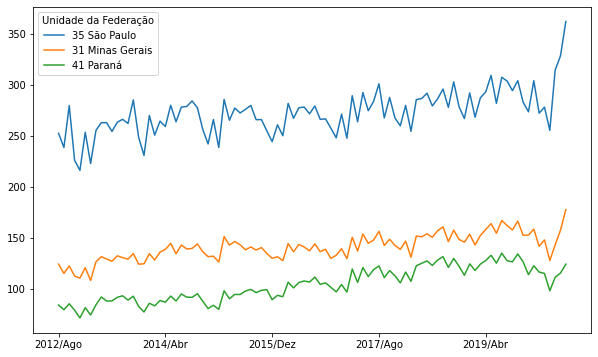

In [9]:
#criação de gráfico utilizando um periodo menor de dados
usaveisordenadas[usaveisordenadas.columns[54:150]].head(3).T.plot(figsize=(10,6))

In [10]:
#Criando o parametro de meses filtrados para replicar o gráfico acima de outro modo
mesesfiltrados = usaveisordenadas.columns[54:150]

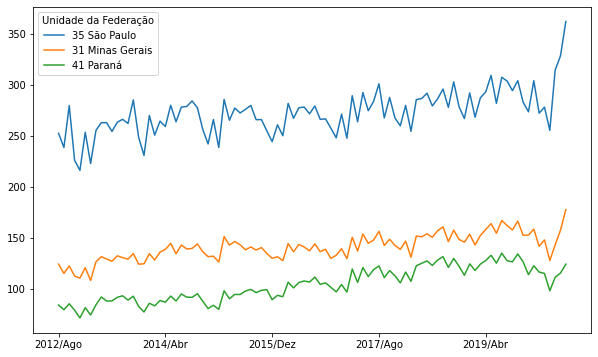

In [11]:
#plot do grafico usando o parametro de meses filtrados
usaveisordenadas[mesesfiltrados].head(3).T.plot(figsize=(10,6))

(0.0, 350.0)

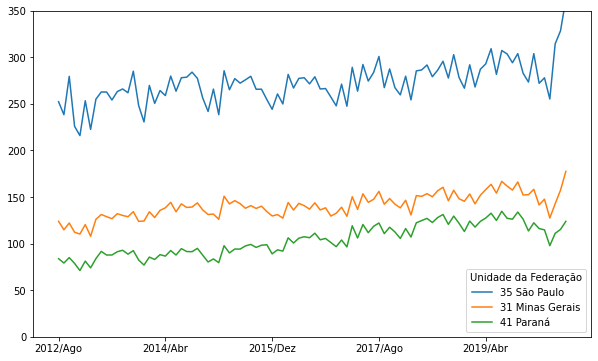

In [12]:
#alterando o eixo Y para melhor leitura do gráfico partindo do ponto 0 (zero)
usaveisordenadas[mesesfiltrados].head(3).T.plot(figsize=(10,6))
plt.ylim(0,350)

(100.0, 350.0)

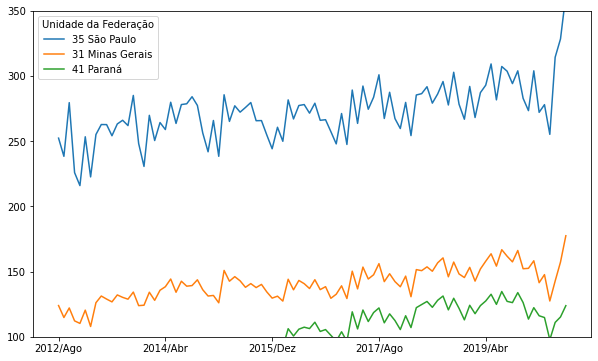

In [13]:
#Alterando o gráfico para uma partida do eixo Y para dificultar a leitura
usaveisordenadas[mesesfiltrados].head(3).T.plot(figsize=(10,6))
plt.ylim(100,350)

(100.0, 350.0)

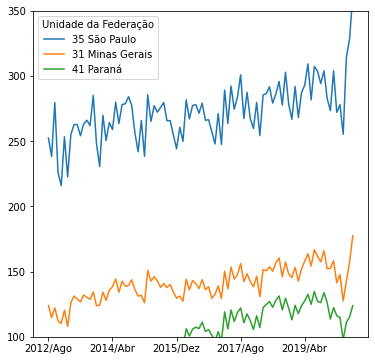

In [14]:
#Alterando o tamanho do gráfico anterior para dar uma percepção de agilidade na variação dos gastos
usaveisordenadas[mesesfiltrados].head(3).T.plot(figsize=(6,6))
plt.ylim(100,350)

##Desafio 02: Reflita sobre os problemas na manipulação de dados e discuta esse assunto no Discord.

A visualização dos dados e relatório podem ser trabalhados a modo que dificulte a leitura ou gere estranheza, isso acontece propositalmente ou até por descuido. 
Mas isso pode levar ao um desvio de foco do leitor, podendo esconder fatos importante sobre a analise.
O Ideal como nossa missão de ciêntistas, é buscar demonstrar os fatos na nossa analise, sendo imparcial e claro nas nossas demonstração.
Para isso, é importante entregar o gráfico com a leitura o mais fácil possível, para que o leitor consiga absorver com mais facilidade as informações passadas, e possa de visualizar o fato ocorrido com a maior clareza, e com isso tomar as melhores decisões.